In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

## Read in the unlabelled data points

#### The dataset has been downloaded from [https://www.kaggle.com/harrywang/wine-dataset-for-clustering/version/1](https://www.kaggle.com/harrywang/wine-dataset-for-clustering/version/1)

In [2]:
df = pd.read_csv('data/wine-clustering.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
X = np.array(df, dtype = np.float64)

In [6]:
X.shape

(178, 13)

## Perform min-max scaling on the data-points

In [7]:
def min_max_scaler(X):
    """Scales the given X feature vector in the range of [0,1].
        For each feature x_j, 
            x_j_new = (x_j - x_j_min)/(x_j_max - x_j_min)"""
    X_min = np.min(X,axis = 0)
    X_max = np.max(X,axis = 0)
    return (X-X_min)/(X_max - X_min)

In [8]:
X = min_max_scaler(X)

## Visualize the given datapoints

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)

X_reduced = pca.fit_transform(X)

In [11]:
X_reduced_df =pd.DataFrame(X_reduced)

In [12]:
X_reduced_df

,0,1
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


<AxesSubplot:xlabel='0', ylabel='1'>

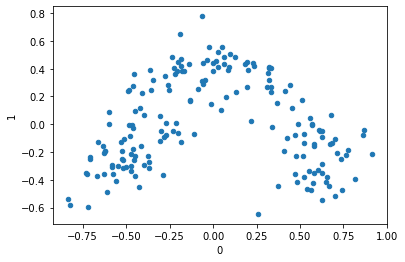

In [13]:
X_reduced_df.plot.scatter(x = 0, y =1)

## K-Means Clustering 

In [14]:
class k_means():
    def __init__(self,K=1):
        self.K = K
        
    def random_init(self,X):
        '''randomly initialize K cluster centroids using data points'''
        random_indices = np.random.choice(self.X.shape[0],self.K,replace = False)
        self.mu = self.X[random_indices,:]
        # cluster indices assigned 
        self.c = np.ones(X.shape[0], dtype = np.int32) * -1
        
    def assign_cluster(self):
        m = self.X.shape[0]
        for i in range(m): # assign the point to the nearest cluster
            self.c[i] = np.argmin(np.linalg.norm(X[i,:] - self.mu, axis = 1))
    
    def move_centroid(self):
        for k in range(self.K): # move the centre of k-th centroid to the mean of points in k-th cluster
            self.mu[k] = np.mean(X[self.c == k,:], axis = 0 ) 
            
    def distortion(self):
        m = self.X.shape[0]
        distortion = 0
        for i in range(m):
            distortion += ((np.linalg.norm(self.X[i,:] - self.mu[self.c[i]]))**4)/m
        return distortion
            
    def fit(self, X, iters = 10):
        self.X  = X
        self.random_init(self.X)
        for iteration in range(iters):
            self.assign_cluster()
            self.move_centroid()     
        

In [15]:
model = k_means(K = 3)

In [16]:
model.fit(X,iters= 100)

In [17]:
model.c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## Visualize the obtained clusters

<AxesSubplot:xlabel='0', ylabel='1'>

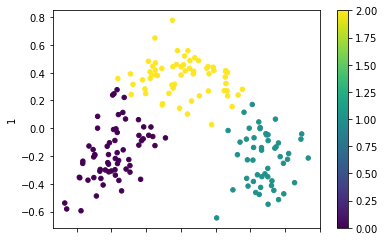

In [18]:
X_reduced_df.plot.scatter(x = 0, y = 1, c= model.c, cmap = 'viridis')

## Plot distortion vs number of clusters: Elbow Method

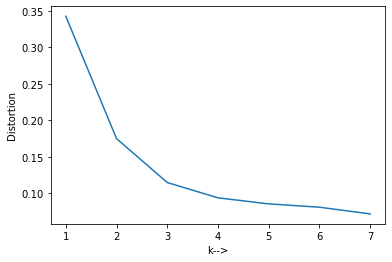

In [19]:
k_s = range(1,8)
distortions = []
for k in k_s:
    model=k_means(K= k)
    model.fit(X)
    distortions.append(model.distortion())

plt.plot(k_s,distortions)
plt.xlabel('k-->')
plt.ylabel('Distortion')
plt.show()